In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from matplotlib import rc
rc('font', family='Malgun Gothic')

In [11]:
dfks = pd.read_csv('dfks.csv', encoding='utf-8')

In [13]:
del dfks['Unnamed: 0']

In [15]:
dfks2 = dfks[(dfks['시간']==7) | (dfks['시간']==8)]

In [16]:
dfks2.head()

,LinkID,도로등급,연장,도로명,도로번호,시도명,시군구명,읍면동명,시간,전체,승용차,버스,트럭,전체평균속도,통과시간,km당통과시간
7,1011122,101,5.596,서해안고속도로,15,경기도,평택시,포승읍,7,1587.0,1075.0,23.0,489.0,128.763268,0.043460,23.009876
8,1011122,101,5.596,서해안고속도로,15,경기도,평택시,포승읍,8,1768.0,1197.0,26.0,545.0,128.373634,0.043592,22.940249
31,1011123,101,0.357,서해안고속도로,15,경기도,평택시,포승읍,7,1333.0,926.0,20.0,387.0,128.801659,0.002772,360.788962
32,1011123,101,0.357,서해안고속도로,15,경기도,평택시,포승읍,8,1457.0,1016.0,22.0,419.0,128.374380,0.002781,359.592102
55,1011124,108,0.630,서해안고속도로,15,경기도,평택시,포승읍,7,132.0,90.0,2.0,40.0,50.144552,0.012564,79.594527


In [18]:
dfks22 = dfks2.groupby('LinkID').agg({'도로등급':max, '연장':max, '도로명':max, '도로번호':max, '전체':np.mean, '승용차':np.mean, '버스':np.mean, '전체평균속도':np.mean, '통과시간':np.mean})

In [19]:
dfks22.to_csv('dfks22.csv', encoding='euc_kr')

In [173]:
ch = dfks[(dfks['시간']==7 )|(dfks['시간']==8)].groupby('LinkID').agg({'전체평균속도': np.mean, '연장':np.mean, '읍면동명':max, '시도명':max, '시군구명':max})

In [171]:
ch.groupby('시군구명')['전체평균속도'].mean().sort_values(ascending=False)

시군구명
여주시        54.842714
이천시        54.674824
안성시        54.404042
양평군        52.543685
연천군        51.674589
김포시        50.177765
포천시        49.532777
용인시처인구     49.212672
가평군        49.207474
하남시        48.839815
의왕시        47.897025
구리시        47.711235
광주시        47.608900
고양시덕양구     47.326366
남양주시       46.866136
파주시        46.698518
양주시        45.285679
화성시        44.832251
의정부시       44.491121
성남시수정구     44.300490
평택시        44.290704
용인시기흥구     43.248662
고양시일산서구    43.155895
강동구        42.641356
시흥시        42.595655
과천시        41.709991
성남시중원구     41.566623
부천시오정구     39.526060
군포시        39.055973
성남시분당구     38.811468
             ...    
서초구        36.263974
용산구        36.241775
오산시        36.083998
마포구        36.026908
동두천시       36.001941
수원시영통구     35.958874
송파구        35.914237
성동구        35.823866
용인시수지구     35.218595
수원시팔달구     35.012682
영등포구       33.952514
동작구        33.893164
구로구        33.251608
성북구        33.114495
안산시단원구     32.914374
안양시동안구     32.841527
부천시소사구  

In [178]:
dfseo = pd.read_csv('K_to_Seo2.csv',encoding='euc_kr')

In [216]:
dfraw = pd.read_csv('ch3.csv', encoding='euc_kr')

In [250]:
dfseo = pd.read_csv('K_to_Seo3.csv', encoding='euc_kr')

In [214]:
tt = dfraw[['평균시간']][dfraw['LinkID'] == 1096566]

In [257]:
len(dfseo)

6046

In [262]:
len(timedf)

555

In [ ]:
timedf = []
distdf = []
for a in range(0,6046):
    time1, time2 = 0,0
    dist1, dist2 = 0,0
    c = 14
    print(a)
    for b in range(0, dfseo.iloc[a,2]) :
        link_id = dfseo.iloc[a,c]
        if link_id == 0 :
            pass
        elif np.sum(dfraw['LinkID'].isin([link_id])) == 0:
            pass
        else :            
            time1 = dfraw[['평균시간']][dfraw['LinkID'] == link_id].iloc[0,0] + time1
            # time2 = time1.iloc[0,0] + time2
            dist1 = dfraw[['거리']][dfraw['LinkID'] == link_id].iloc[0,0] + dist1
            # dist2 = dist1.iloc[0,0] + dist2
        c = c+1
    timedf.append(time1)
    distdf.append(dist1)

In [359]:
len(dfks)

702072

In [358]:
np.sum(dfks['버스'].isnull())

17568

In [ ]:
dfks2 = dfks[(dfks['시간']==7) | (dfks['시간']==8) ]

In [361]:
len(dfks2)

58506

In [373]:
np.sum(dfks2['버스'].isnull())

1464

In [371]:
1464/58506

0.02502307455645575

In [328]:
dfks3 = dfks2.groupby('LinkID')[['전체', '버스', '승용차']].mean()

In [332]:
dfks3 = dfks3.reindex()

In [341]:
dfks3 = dfks3.reset_index()

In [391]:
dfks3[dfks3['LinkID']==1100455.0]

,LinkID,전체,버스,승용차
28685,1100455,NaN,NaN,NaN


In [345]:
len(dfseo)

6046

In [392]:
dfks3 = dfks3.fillna(0)

In [394]:
buslist = []
carlist = []
alllist = []
for a in range(0,6046):
    bus1, all1, car1 = 0,0,0
    c = 14
    for b in range(0, dfseo.iloc[a,2]) :
        link_id = dfseo.iloc[a,c]
        if (link_id == 0) : 
            pass
        elif (np.sum(dfks3['LinkID'].isin([link_id])) == 0) : 
            pass
        else :
            bus1 = dfks3[['버스']][dfks3['LinkID'] == link_id].iloc[0,0] + bus1
            car1 = dfks3[['승용차']][dfks3['LinkID'] == link_id].iloc[0,0] + car1
            all1 = dfks3[['전체']][dfks3['LinkID'] == link_id].iloc[0,0] + all1
        c = c+1
    if a % 500 == 0:
        print(a)
    buslist.append(bus1)
    alllist.append(all1)
    carlist.append(car1)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000


In [395]:
del dfseo2['버스']
del dfseo2['승용차']
del dfseo2['전체']

In [396]:
dfseo2['버스'] = buslist
dfseo2['승용차'] = carlist
dfseo2['전체'] = alllist

In [397]:
dfseo2.to_csv('dfseo3.csv', encoding='euc_kr')

In [419]:
kkfe = pd.read_csv('kkfeature3.csv', encoding='euc_kr')

In [420]:
kkfe.head()

,LinkID,1인가구수,면적당지하철,광역버스,출근급행,남경제,남비경제,여경제,여비경제
0,1011122,47126,0.011002,0,0,0.373952,0.138769,0.292738,0.194542
1,1011123,47126,0.011002,0,0,0.373952,0.138769,0.292738,0.194542
2,1011124,47126,0.011002,0,0,0.373952,0.138769,0.292738,0.194542
3,1011125,47126,0.011002,0,0,0.373952,0.138769,0.292738,0.194542
4,1011126,47126,0.011002,0,0,0.373952,0.138769,0.292738,0.194542


In [422]:
dfseo3 = pd.merge(dfseo2, kkfe, how='inner', left_on='start', right_on='LinkID')

In [425]:
dfseo3.to_csv('dfseo4.csv', encoding='euc_kr')

In [291]:
dfdf = pd.read_csv('dfdf.csv', encoding='euc_kr')

In [294]:
dfseo2 = pd.merge(dfseo, dfdf, how='inner', left_on='start', right_on='LinkID')

In [300]:
dfseo2.to_csv('dfseo2.csv', encoding='euc_kr')

In [ ]:
dfseo2.to_csv()

In [ ]:
dfseo.join(dfdf)

In [284]:
len(dfseo)

6046

In [286]:
dfseo['총시간'] = timedf

In [288]:
dfseo['총거리'] = distdf

In [289]:
dfseo.head()

,TPath,TPCnt,TLinkCnt,TPCnt_group,start,end,LinkID_x,시도명_x,시군구명_x,읍면동명_x,...,145,146,147,148,149,150,151,152,총시간,총거리
0,"1070108,1101344,1100973,1070110,1070112",10,5,0_10,1070108,1070112,1070108.0,경기도,부천시원미구,소사동,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146997,4.160
1,"1070108,1101344,1100973,1070110,1070112,109786...",16,16,10_50,1070108,1014504,1070108.0,경기도,부천시원미구,소사동,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.307355,7.426
2,"1070108,1101344,1100973,1070110,1070112,109786...",18,37,10_50,1070108,1018972,1070108.0,경기도,부천시원미구,소사동,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.475402,12.736
3,"1070108,1101344,1100973,1070110,1070112,109786...",11,20,10_50,1070108,1096113,1070108.0,경기도,부천시원미구,소사동,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.331132,8.090
4,"1070108,1101344,1100973,1070110,1070112,109786...",12,62,10_50,1070108,1096135,1070108.0,경기도,부천시원미구,소사동,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849110,21.456


In [ ]:
bdfseo['']

In [283]:
len(timedf)

6046

In [245]:
dfks.head()

,LinkID,도로등급,연장,도로명,도로번호,시도명,시군구명,읍면동명,시간,전체,승용차,버스,트럭,전체평균속도,통과시간,km당통과시간,버스비율
0,1011122,101,5.596,서해안고속도로,15,경기도,평택시,포승읍,0,576.0,384.0,8.0,184.0,125.892680,0.044451,22.496905,0.013889
1,1011122,101,5.596,서해안고속도로,15,경기도,평택시,포승읍,1,390.0,258.0,6.0,126.0,127.556757,0.043871,22.794274,0.015385
2,1011122,101,5.596,서해안고속도로,15,경기도,평택시,포승읍,2,312.0,207.0,4.0,101.0,126.009208,0.044409,22.517728,0.012821
3,1011122,101,5.596,서해안고속도로,15,경기도,평택시,포승읍,3,313.0,207.0,4.0,102.0,124.055816,0.045109,22.168659,0.012780
4,1011122,101,5.596,서해안고속도로,15,경기도,평택시,포승읍,4,437.0,291.0,6.0,140.0,122.301331,0.045756,21.855134,0.013730


In [157]:
ch.to_csv('ch.csv')

In [31]:
tp =pd.read_csv('yearvador.csv', engine='python')

In [168]:
dfks[dfks['LinkID']==1101343].sort_values(by='전체평균속도', ascending=False)

,LinkID,도로등급,연장,도로명,도로번호,시도명,시군구명,읍면동명,시간,전체,승용차,버스,트럭,전체평균속도,통과시간,km당통과시간,버스비율
701812,1101343,104,0.029,창경궁로,0,서울특별시,종로구,혜화동,4,151.0,120.0,1.0,30.0,27.262494,0.001064,940.086007,0.006623
701811,1101343,104,0.029,창경궁로,0,서울특별시,종로구,혜화동,3,153.0,122.0,1.0,30.0,26.324060,0.001102,907.726219,0.006536
701813,1101343,104,0.029,창경궁로,0,서울특별시,종로구,혜화동,5,228.0,188.0,2.0,38.0,25.118748,0.001155,866.163737,0.008772
701808,1101343,104,0.029,창경궁로,0,서울특별시,종로구,혜화동,0,341.0,289.0,4.0,48.0,23.705273,0.001223,817.423201,0.011730
701810,1101343,104,0.029,창경궁로,0,서울특별시,종로구,혜화동,2,201.0,164.0,2.0,35.0,23.452527,0.001237,808.707813,0.009950
701814,1101343,104,0.029,창경궁로,0,서울특별시,종로구,혜화동,6,418.0,359.0,5.0,54.0,22.413753,0.001294,772.888021,0.011962
701809,1101343,104,0.029,창경궁로,0,서울특별시,종로구,혜화동,1,267.0,222.0,3.0,42.0,22.404205,0.001294,772.558806,0.011236
701831,1101343,104,0.029,창경궁로,0,서울특별시,종로구,혜화동,23,463.0,400.0,5.0,58.0,20.294957,0.001429,699.826089,0.010799
701826,1101343,104,0.029,창경궁로,0,서울특별시,종로구,혜화동,18,680.0,600.0,8.0,72.0,20.124903,0.001441,693.962175,0.011765
701815,1101343,104,0.029,창경궁로,0,서울특별시,종로구,혜화동,7,673.0,593.0,8.0,72.0,19.146863,0.001515,660.236672,0.011887


In [140]:
dfks2 = dfks.copy()

In [144]:
dfks3 = dfks2[dfks2['전체평균속도'] != 0]

In [145]:
dfks3.sort_values(by='전체평균속도', ascending=True)

,LinkID,도로등급,연장,도로명,도로번호,시도명,시군구명,읍면동명,시간,전체,승용차,버스,트럭,전체평균속도,통과시간,km당통과시간,버스비율
89261,1016677,105,0.358,효행로,84,경기도,수원시권선구,평동,5,79.0,65.0,2.0,12.0,3.000000,0.119333,8.379888,0.025316
89262,1016677,105,0.358,효행로,84,경기도,수원시권선구,평동,6,188.0,152.0,6.0,30.0,3.000000,0.119333,8.379888,0.031915
89260,1016677,105,0.358,효행로,84,경기도,수원시권선구,평동,4,29.0,24.0,1.0,4.0,3.000000,0.119333,8.379888,0.034483
89259,1016677,105,0.358,효행로,84,경기도,수원시권선구,평동,3,22.0,19.0,0.0,3.0,3.000000,0.119333,8.379888,0.000000
89258,1016677,105,0.358,효행로,84,경기도,수원시권선구,평동,2,26.0,22.0,1.0,3.0,3.000000,0.119333,8.379888,0.038462
89257,1016677,105,0.358,효행로,84,경기도,수원시권선구,평동,1,37.0,31.0,1.0,5.0,3.000000,0.119333,8.379888,0.027027
85273,1016511,105,0.355,효행로,84,경기도,수원시권선구,평동,1,53.0,45.0,1.0,7.0,3.000000,0.118333,8.450704,0.018868
85274,1016511,105,0.355,효행로,84,경기도,수원시권선구,평동,2,38.0,33.0,0.0,5.0,3.000000,0.118333,8.450704,0.000000
85275,1016511,105,0.355,효행로,84,경기도,수원시권선구,평동,3,35.0,31.0,0.0,4.0,3.000000,0.118333,8.450704,0.000000
85276,1016511,105,0.355,효행로,84,경기도,수원시권선구,평동,4,56.0,48.0,1.0,7.0,3.000000,0.118333,8.450704,0.017857


In [143]:
dfks2.sort_values(by='전체평균속도', ascending=True)

,LinkID,도로등급,연장,도로명,도로번호,시도명,시군구명,읍면동명,시간,전체,승용차,버스,트럭,전체평균속도,통과시간,km당통과시간,버스비율
90745,1016739,107,0.046,용담로,0,경기도,화성시,매송면,1,8.0,8.0,0.0,0.0,0.0,inf,0.000000,0.000000
505821,1086667,107,0.359,동백죽전대로,0,경기도,용인시기흥구,동백동,21,493.0,396.0,2.0,95.0,0.0,inf,0.000000,0.004057
490874,1086045,107,0.136,칠보로,0,경기도,수원시권선구,금호동,2,4.0,4.0,0.0,0.0,0.0,inf,0.000000,0.000000
488880,1085962,107,2.067,매송고색로794번길,0,경기도,수원시권선구,평동,0,11.0,7.0,0.0,4.0,0.0,inf,0.000000,0.000000
488424,1085943,107,0.131,산업로,0,경기도,수원시권선구,평동,0,4.0,4.0,0.0,0.0,0.0,inf,0.000000,0.000000
172178,1020154,107,0.550,청석로,0,경기도,파주시,운정3동,2,25.0,24.0,0.0,1.0,0.0,inf,0.000000,0.000000
332238,1041756,108,0.179,태릉구리간고속화도로,0,경기도,남양주시,지금동,6,392.0,323.0,3.0,66.0,0.0,inf,0.000000,0.007653
332239,1041756,108,0.179,태릉구리간고속화도로,0,경기도,남양주시,지금동,7,438.0,359.0,4.0,75.0,0.0,inf,0.000000,0.009132
332240,1041756,108,0.179,태릉구리간고속화도로,0,경기도,남양주시,지금동,8,422.0,347.0,3.0,72.0,0.0,inf,0.000000,0.007109
243943,1038077,107,0.034,신수로,0,경기도,성남시분당구,구미1동,7,81.0,77.0,0.0,4.0,0.0,inf,0.000000,0.000000


In [139]:
dfks.sort_values(by='전체평균속도', ascending=True)

,LinkID,도로등급,연장,도로명,도로번호,시도명,시군구명,읍면동명,시간,전체,승용차,버스,트럭,전체평균속도,통과시간,km당통과시간,버스비율
90745,1016739,107,0.046,용담로,0,경기도,화성시,매송면,1,8.0,8.0,0.0,0.0,0.0,inf,0.000000,0.000000
505821,1086667,107,0.359,동백죽전대로,0,경기도,용인시기흥구,동백동,21,493.0,396.0,2.0,95.0,0.0,inf,0.000000,0.004057
490874,1086045,107,0.136,칠보로,0,경기도,수원시권선구,금호동,2,4.0,4.0,0.0,0.0,0.0,inf,0.000000,0.000000
488880,1085962,107,2.067,매송고색로794번길,0,경기도,수원시권선구,평동,0,11.0,7.0,0.0,4.0,0.0,inf,0.000000,0.000000
488424,1085943,107,0.131,산업로,0,경기도,수원시권선구,평동,0,4.0,4.0,0.0,0.0,0.0,inf,0.000000,0.000000
172178,1020154,107,0.550,청석로,0,경기도,파주시,운정3동,2,25.0,24.0,0.0,1.0,0.0,inf,0.000000,0.000000
332238,1041756,108,0.179,태릉구리간고속화도로,0,경기도,남양주시,지금동,6,392.0,323.0,3.0,66.0,0.0,inf,0.000000,0.007653
332239,1041756,108,0.179,태릉구리간고속화도로,0,경기도,남양주시,지금동,7,438.0,359.0,4.0,75.0,0.0,inf,0.000000,0.009132
332240,1041756,108,0.179,태릉구리간고속화도로,0,경기도,남양주시,지금동,8,422.0,347.0,3.0,72.0,0.0,inf,0.000000,0.007109
243943,1038077,107,0.034,신수로,0,경기도,성남시분당구,구미1동,7,81.0,77.0,0.0,4.0,0.0,inf,0.000000,0.000000


In [128]:
tp.sort_values(by='TPCnt', ascending=False)

,TPath,TPCnt,TLinkCnt
3916442,"1089709,1013431,1098614,1101107,1013331,101317...",1801,8
5338177,"1095526,1040796,1040814,1040818,1040820,104082...",1628,12
4698276,"1094240,1013191,1013229,1013238,1013232,109988...",1424,8
5101067,"1095107,1042813,1042811,1042808,1095105",1084,5
5132028,"1095159,1042834,0,1084898,1042807",1076,5
4674972,"1094199,1089859,1019983,1089866,1019987,109421...",1050,13
4694561,"1094211,1099883,1099885,1013231,1013237,101323...",1033,8
6920053,"1100333,1100334,1100338,1041066,1041063,104107...",1031,10
3915415,"1089709,1013431,1098614,1101107,1013331,101317...",920,8
4698535,"1094240,1013191,1013229,1013238,1013232,109988...",887,13


In [61]:
len(tp)

7204061

In [74]:
len(tp[tp['TPCnt']>=10])

103665

In [79]:
tp.loc[:,'TPath']

0          1000987,1001783,1001784,1001790,1001835,100184...
1          1000987,1001783,1001784,1001790,1001835,100184...
2          1000987,1001783,1001784,1001790,1001835,100184...
3          1069503,0,1090781,1090783,1039862,1040091,1040...
4          1069503,0,1090781,1090783,1039862,1040092,1040...
5          1069503,0,1090781,1090783,1039862,1040092,1095...
6          1069503,0,1090781,1090783,1039862,1040092,1095...
7          1069503,0,1090781,1090783,1039862,1040094,0,10...
8          1069503,0,1090781,1090783,1039862,1040094,0,10...
9                1069503,0,1095724,1039859,1097313,0,1069392
10             1069503,1090780,0,1095724,0,1039853,0,1095723
11         1069503,1090780,0,1095724,0,1039853,1069502,10...
12         1069503,1090780,0,1095724,0,1039853,1069502,10...
13               1069503,1090780,0,1095724,0,1039853,1098623
14               1069503,1090780,0,1095724,1095723,0,1098623
15         1069503,1090780,0,1095724,1095723,1090781,1090783
16         1069503,10907

In [ ]:
tp['TP']

In [53]:
tp2 = pd.concat(tp.loc[:, ['TPCnt','TLinkCnt']], tp.iloc[:,0].str.split(',', expand=True), axis=1)

MemoryError: 

In [55]:
tp.sort_values(by='TPCnt', ascending=False)

,TPath,TPCnt,TLinkCnt
3916442,"1089709,1013431,1098614,1101107,1013331,101317...",1801,8
5338177,"1095526,1040796,1040814,1040818,1040820,104082...",1628,12
4698276,"1094240,1013191,1013229,1013238,1013232,109988...",1424,8
5101067,"1095107,1042813,1042811,1042808,1095105",1084,5
5132028,"1095159,1042834,0,1084898,1042807",1076,5
4674972,"1094199,1089859,1019983,1089866,1019987,109421...",1050,13
4694561,"1094211,1099883,1099885,1013231,1013237,101323...",1033,8
6920053,"1100333,1100334,1100338,1041066,1041063,104107...",1031,10
3915415,"1089709,1013431,1098614,1101107,1013331,101317...",920,8
4698535,"1094240,1013191,1013229,1013238,1013232,109988...",887,13


In [43]:
tp.loc?

In [ ]:
pd.concat([tp.iloc['TPCnt', 'TLinkCnt']])

In [ ]:
pd.concat([df[[0]], df[1].str.split(', ', expand=True)], axis=1)

In [2]:
dfks = pd.read_csv('dfks.csv')

In [4]:
del dfks['Unnamed: 0']

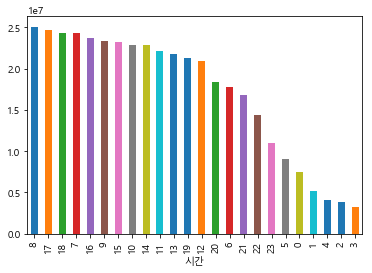

In [10]:
# 시간대별 교통량
dfks.groupby('시간')['전체'].sum().sort_values(ascending=False).plot(kind='bar')

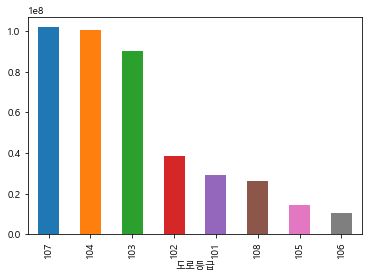

In [19]:
# 도로등급별 통행량
dfks.groupby('도로등급')['전체'].sum().sort_values(ascending=False).plot(kind='bar')

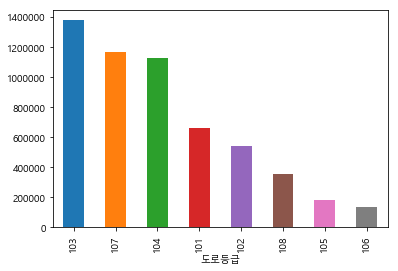

In [23]:
dfks.groupby('도로등급')['버스'].sum().sort_values(ascending=False).plot(kind='bar')

In [29]:
dfks['버스비율'] = dfks['버스'] / dfks['전체']

In [30]:
dfks.corr()

,LinkID,도로등급,연장,도로번호,시간,전체,승용차,버스,트럭,전체평균속도,통과시간,km당통과시간,버스비율
LinkID,1.000000e+00,1.817407e-01,7.731898e-02,-9.080908e-02,7.764182e-22,-0.209914,-0.208982,-0.136678,-0.193097,-0.254207,0.165403,-0.131540,-0.066087
도로등급,1.817407e-01,1.000000e+00,-1.159924e-01,-3.038958e-02,1.562877e-21,-0.406466,-0.400806,-0.348386,-0.381586,-0.264786,-0.035410,-0.040614,-0.198032
연장,7.731898e-02,-1.159924e-01,1.000000e+00,2.207998e-01,-5.973910e-19,-0.005899,-0.019182,0.043316,0.047406,0.175027,0.901098,-0.202176,0.021719
도로번호,-9.080908e-02,-3.038958e-02,2.207998e-01,1.000000e+00,6.564711e-18,-0.066700,-0.078423,-0.043937,-0.008951,0.160027,0.191769,0.013224,-0.008607
시간,7.764182e-22,1.562877e-21,-5.973910e-19,6.564711e-18,1.000000e+00,0.171834,0.172652,0.125152,0.149738,-0.129897,0.037167,-0.026918,0.162362
전체,-2.099135e-01,-4.064658e-01,-5.899090e-03,-6.669989e-02,1.718337e-01,1.000000,0.994878,0.809155,0.905669,0.167259,-0.059171,-0.006912,0.357389
승용차,-2.089825e-01,-4.008059e-01,-1.918159e-02,-7.842298e-02,1.726523e-01,0.994878,1.000000,0.785853,0.858612,0.141521,-0.064511,-0.006228,0.341330
버스,-1.366783e-01,-3.483859e-01,4.331629e-02,-4.393702e-02,1.251518e-01,0.809155,0.785853,1.000000,0.778673,0.176617,-0.020169,-0.009095,0.561162
트럭,-1.930974e-01,-3.815856e-01,4.740623e-02,-8.950685e-03,1.497378e-01,0.905669,0.858612,0.778673,1.000000,0.255360,-0.032031,-0.008707,0.356028
전체평균속도,-2.542075e-01,-2.647856e-01,1.750275e-01,1.600269e-01,-1.298969e-01,0.167259,0.141521,0.176617,0.255360,1.000000,-0.074473,0.131461,0.128493


In [25]:
import gc
gc.collect()

57167

In [27]:
gc.collect()

0